In [1]:
import warnings
warnings.filterwarnings('ignore')

import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score


from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

In [2]:
df=pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\dia.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
df["Outcome"].value_counts()

class_0 = df[df["Outcome"]==0]
class_1 = df[df["Outcome"]==1]

In [5]:
class_0

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [6]:
class_1


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
2,8,183,64,0,0,23.3,0.672,32,1
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
...,...,...,...,...,...,...,...,...,...
755,1,128,88,39,110,36.5,1.057,37,1
757,0,123,72,0,0,36.3,0.258,52,1
759,6,190,92,0,0,35.5,0.278,66,1
761,9,170,74,31,0,44.0,0.403,43,1


In [7]:
df_n = class_1.sample(500, replace=True)

df = pd.concat([class_0, df_n], axis=0)

df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
93,4,134,72,0,0,23.8,0.277,60,1
287,1,119,86,39,220,45.6,0.808,29,1
132,3,170,64,37,225,34.5,0.356,30,1
659,3,80,82,31,70,34.2,1.292,27,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 1 to 193
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               1000 non-null   int64  
 1   Glucose                   1000 non-null   int64  
 2   BloodPressure             1000 non-null   int64  
 3   SkinThickness             1000 non-null   int64  
 4   Insulin                   1000 non-null   int64  
 5   BMI                       1000 non-null   float64
 6   DiabetesPedigreeFunction  1000 non-null   float64
 7   Age                       1000 non-null   int64  
 8   Outcome                   1000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 78.1 KB


In [9]:
features = df.columns
features

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,4.149000,125.921000,69.567000,20.645000,90.352000,32.924500,0.480468,33.777000,0.50000
std,3.470857,33.079253,19.769531,16.320825,134.486976,7.719745,0.325009,11.290117,0.50025
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.00000
25%,1.000000,102.000000,64.000000,0.000000,0.000000,28.000000,0.245750,25.000000,0.00000
50%,3.000000,122.000000,72.000000,23.500000,0.000000,32.900000,0.382500,31.000000,0.50000
75%,7.000000,148.000000,80.000000,33.000000,140.000000,37.700000,0.647500,41.000000,1.00000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.00000


In [11]:
categorical_columns = []
numerical_columns = []

for col in df.columns:
    if df[col].dtype == 'object':
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
print("Numerical Features: ",numerical_columns)

print("\nCategorical Features: ",categorical_columns)

Numerical Features:  ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

Categorical Features:  []


In [12]:
discrete_features=[feature for feature in numerical_columns if len(df[feature].unique())<25]
continuous_features=[feature for feature in numerical_columns if feature not in discrete_features]

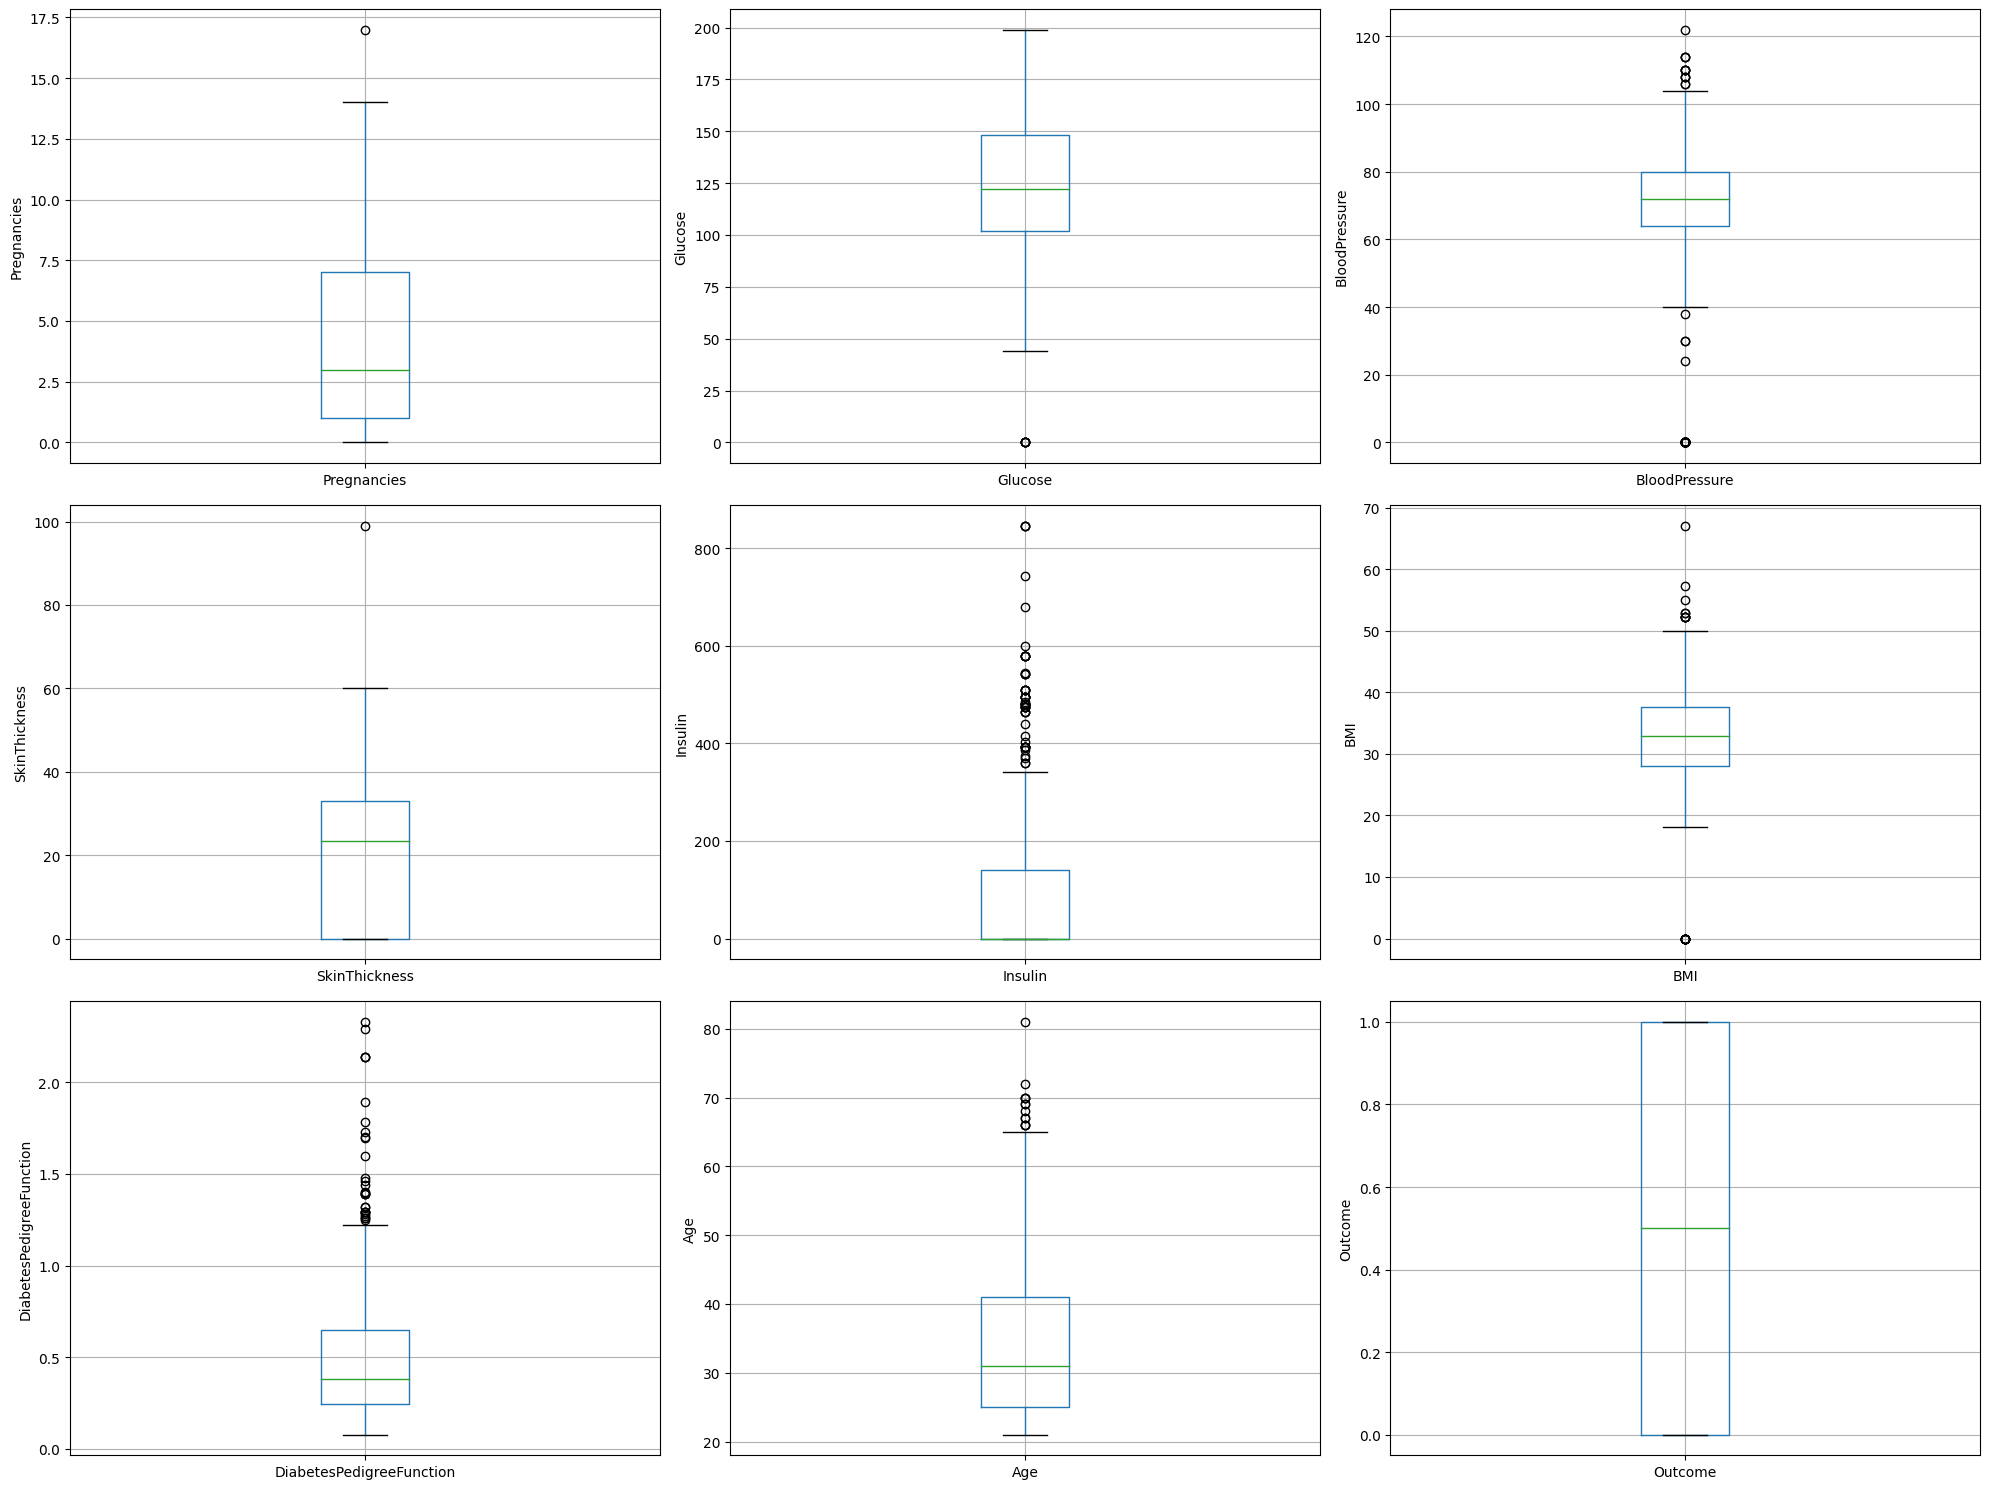

In [13]:
fig, axes = plt.subplots(3,3, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    ax = axes[i]
    df.boxplot(column=col, ax=ax)
    ax.set_ylabel(col)

for j in range(len(df.columns), 3,3):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [14]:
for feature in continuous_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_limit = df[feature].quantile(0.25) - (IQR * 3)
    upper_limit = df[feature].quantile(0.75) + (IQR * 3)
    df.loc[df[feature] >= upper_limit, feature] = upper_limit
    df.loc[df[feature] < lower_limit, feature] = lower_limit

In [15]:
x =  df.drop(columns=['Outcome'],axis=1)
y = df['Outcome']

In [16]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1,1,85,66,29,0,26.6,0.351,31
3,1,89,66,23,94,28.1,0.167,21
5,5,116,74,0,0,25.6,0.201,30
7,10,115,16,0,0,35.3,0.134,29
10,4,110,92,0,0,37.6,0.191,30
...,...,...,...,...,...,...,...,...
93,4,134,72,0,0,23.8,0.277,60
287,1,119,86,39,220,45.6,0.808,29
132,3,170,64,37,225,34.5,0.356,30
659,3,80,82,31,70,34.2,1.292,27


In [17]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.20,random_state=40,stratify=df['Outcome'])

In [19]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Random Forest Classifier': RandomForestClassifier(n_estimators=20, max_depth=10),
    'XG Boost': XGBClassifier(learning_rate=0.01, n_estimators=25, max_depth=15, gamma=0.6, subsample=0.52, colsample_bytree=0.6, seed=27,
                              reg_lambda=2, booster='dart', colsample_bylevel=0.6, colsample_bynode=0.5),
    'K Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Decision Tree': DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=6),
    'Support Vector Machine': SVC(kernel='rbf', C=2, probability=True),
    'AdaBoost Classifier': AdaBoostClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Extra Trees Classifier': ExtraTreesClassifier()
}

In [20]:
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_list = []

for model_name, model in models.items():

    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred = model.predict(x_test)

    test_accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model_name}")
    print("Testing Accuracy: ", test_accuracy)
    print("Precision: ",precision)
    print("Recall: ",recall)
    print("F1 Score: ",f1)


    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1)

    print("=" * 35)

max_accuracy_index = accuracy_list.index(max(accuracy_list))
print(f"The best model based on accuracy is {model_list[max_accuracy_index]} with Testing Accuracy: {accuracy_list[max_accuracy_index]}")

Model: Logistic Regression
Testing Accuracy:  0.73
Precision:  0.7129629629629629
Recall:  0.77
F1 Score:  0.7403846153846153
Model: Naive Bayes
Testing Accuracy:  0.725
Precision:  0.7528089887640449
Recall:  0.67
F1 Score:  0.708994708994709
Model: Random Forest Classifier
Testing Accuracy:  0.805
Precision:  0.7606837606837606
Recall:  0.89
F1 Score:  0.8202764976958524
Model: XG Boost
Testing Accuracy:  0.77
Precision:  0.7288135593220338
Recall:  0.86
F1 Score:  0.7889908256880733
Model: K Nearest Neighbors
Testing Accuracy:  0.735
Precision:  0.7281553398058253
Recall:  0.75
F1 Score:  0.7389162561576353
Model: Decision Tree
Testing Accuracy:  0.795
Precision:  0.7398373983739838
Recall:  0.91
F1 Score:  0.8161434977578476
Model: Support Vector Machine
Testing Accuracy:  0.785
Precision:  0.7714285714285715
Recall:  0.81
F1 Score:  0.7902439024390244
Model: AdaBoost Classifier
Testing Accuracy:  0.765
Precision:  0.7345132743362832
Recall:  0.83
F1 Score:  0.7793427230046949
Mode

In [21]:
param_grid = {
    'Logistic Regression': {'C': [0.1, 1, 10]},
    'Random Forest Classifier': {'n_estimators': [50, 100], 'max_depth': [5, 10]},
    'XG Boost': {'learning_rate': [0.01, 0.1], 'n_estimators': [50, 100], 'max_depth': [10, 15]},
    'K Nearest Neighbors': {'n_neighbors': [5, 10, 15]},
    'Decision Tree': {'max_depth': [5, 10]},
    'Support Vector Machine': {'C': [1, 10]},
    'AdaBoost Classifier': {'n_estimators': [50, 100]},
    'Gradient Boosting Classifier': {'n_estimators': [50, 100]},
    'Extra Trees Classifier': {'n_estimators': [50, 100]}
}

In [22]:
best_model = None
best_accuracy = 0

for model_name, model in models.items():
    if model_name in param_grid:
        grid_search = GridSearchCV(model, param_grid[model_name], cv=5, n_jobs=-1)
        grid_search.fit(x_train, y_train)
        best_model_cv = grid_search.best_estimator_
        best_params = grid_search.best_params_
        print(f"Best parameters for {model_name}: {best_params}")
        y_pred = best_model_cv.predict(x_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"Accuracy on test set for {model_name}: {accuracy}\n")
        
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_model = best_model_cv

Best parameters for Logistic Regression: {'C': 0.1}
Accuracy on test set for Logistic Regression: 0.72

Best parameters for Random Forest Classifier: {'max_depth': 10, 'n_estimators': 50}
Accuracy on test set for Random Forest Classifier: 0.815

Best parameters for XG Boost: {'learning_rate': 0.1, 'max_depth': 15, 'n_estimators': 100}
Accuracy on test set for XG Boost: 0.79

Best parameters for K Nearest Neighbors: {'n_neighbors': 5}
Accuracy on test set for K Nearest Neighbors: 0.77

Best parameters for Decision Tree: {'max_depth': 10}
Accuracy on test set for Decision Tree: 0.825

Best parameters for Support Vector Machine: {'C': 10}
Accuracy on test set for Support Vector Machine: 0.805

Best parameters for AdaBoost Classifier: {'n_estimators': 100}
Accuracy on test set for AdaBoost Classifier: 0.775

Best parameters for Gradient Boosting Classifier: {'n_estimators': 100}
Accuracy on test set for Gradient Boosting Classifier: 0.81

Best parameters for Extra Trees Classifier: {'n_est

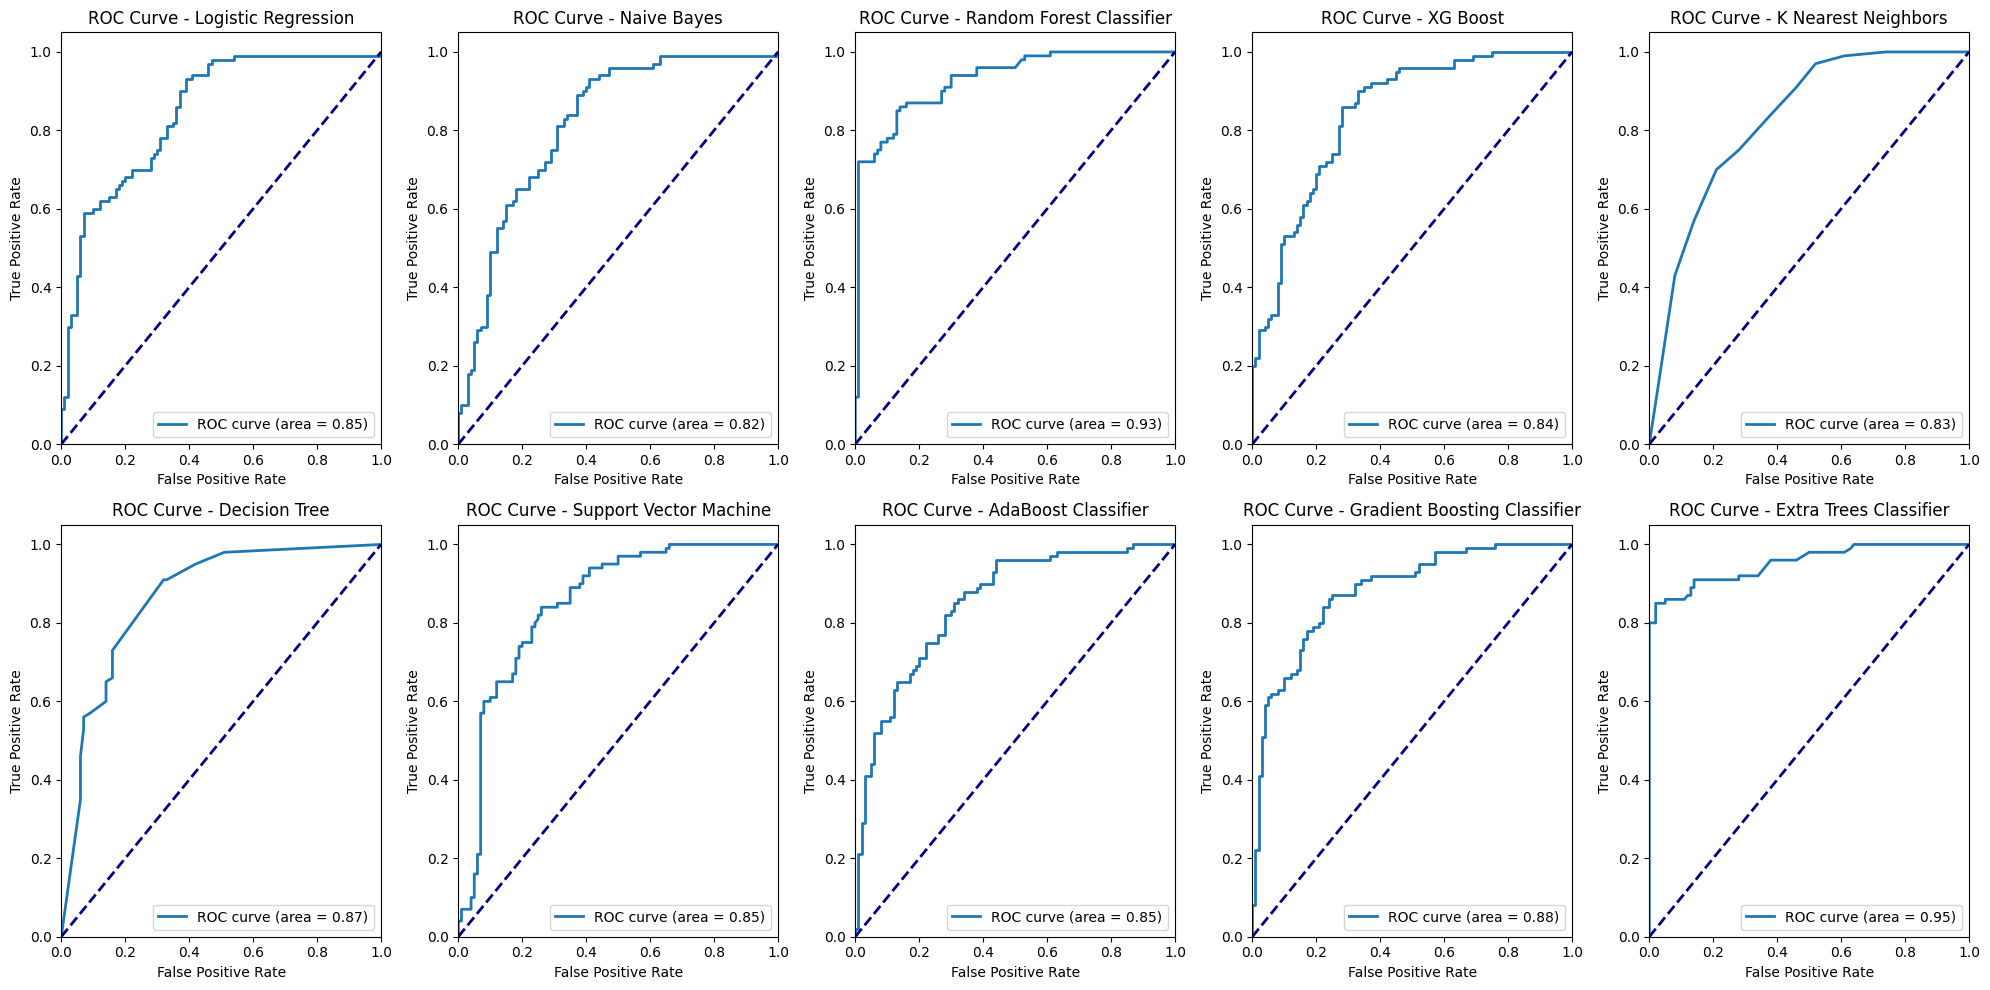

In [23]:
def plot_roc_curve(ax, y_true, y_score, model_name):
    fpr, tpr, thresholds = roc_curve(y_true, y_score)
    roc_auc = roc_auc_score(y_true, y_score)
    ax.plot(fpr, tpr, lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('ROC Curve - ' + model_name)
    ax.legend(loc="lower right")

fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()

for i, (model_name, model) in enumerate(models.items()):
    model.fit(x_train, y_train)
    y_score = model.predict_proba(x_test)[:, 1] 
    plot_roc_curve(axs[i], y_test, y_score, model_name)

plt.tight_layout()
plt.show()

In [24]:
best_model = models['Extra Trees Classifier']
pickle.dump(best_model,open('Diabetes_Model.pkl','wb'))
pickle.dump(scaler,open('Diabetes_Preprocessor.pkl','wb'))